### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: CHINA, GERMANY, ITALY, SOUTH KOREA, JAPAN, USA, AUSTRALIA

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6


Start importing files in folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', '03-08-2020.csv', '03-09-2020.csv', '03-10-2020.csv', '03-11-2020.csv', '03-12-2020.csv', '03-13-2020.csv', '03-14-2020.csv',

### Number of covid-19 outbreak days 

In [2]:
from covid import *
len(data)

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


310

### Number of RECOVERED in the first outbreak day

In [3]:
totalrecovered_by_day[0]

28.0

### Number of RECOVERED in the latest outbreak day

In [4]:
totalrecovered_by_day[-1]

39069813

### New Recovered in the World changed by day

('Last day Increasing', 365096)

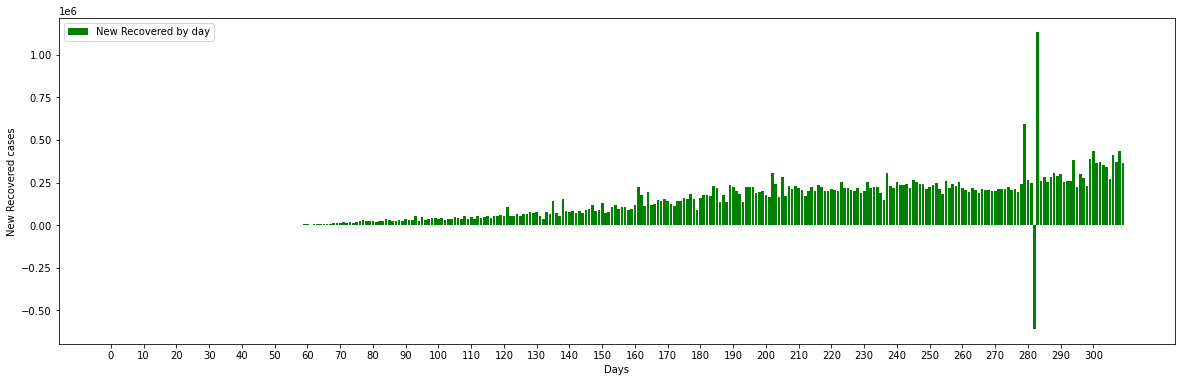

In [5]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.legend(loc='upper left')
('Last day Increasing', totalrecovered_by_day[-1]-totalrecovered_by_day[-2])

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'New Recovered cases in log_values')

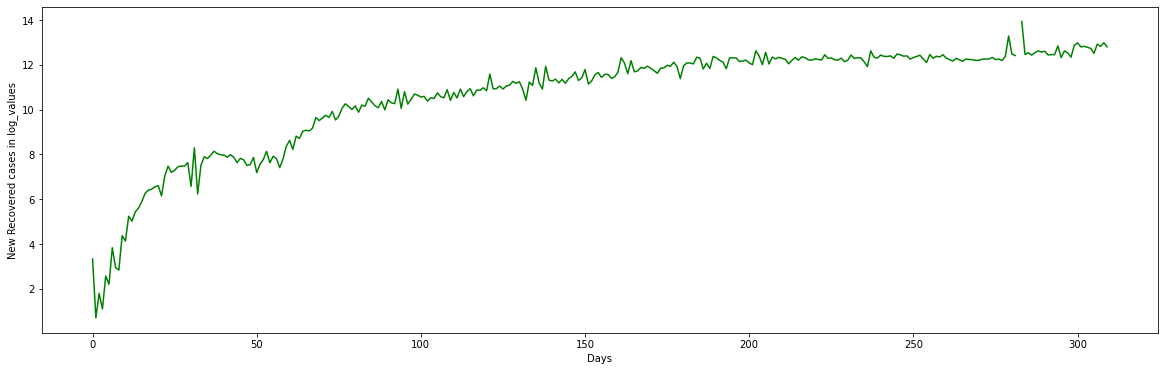

In [6]:
plt.plot(x_dat, np.log(newRecoveredByDay), color='green')
plt.xlabel('Days')
plt.ylabel('New Recovered cases in log_values')

Last day (%):  64.077
Highest Ratio until now (%):  69.782


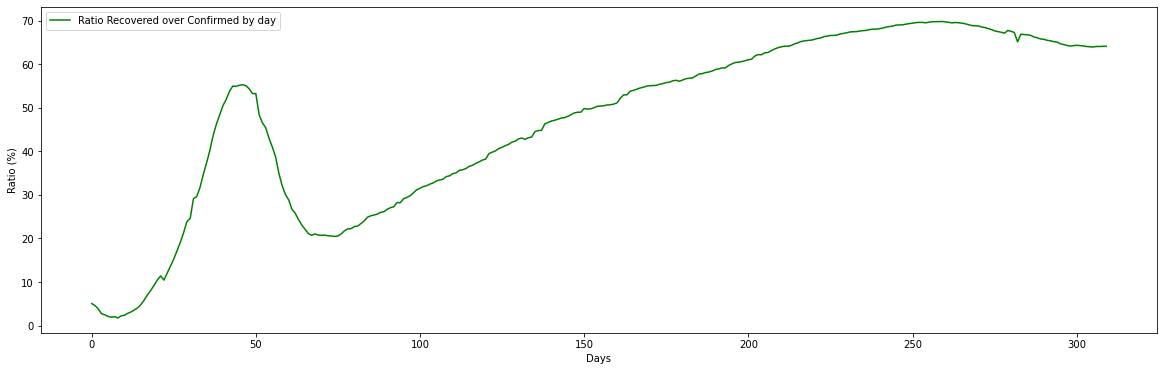

In [7]:
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.legend(loc='upper left')
print("Last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))

### Number of RECOVERED in the World from day 0 to latest day

('Total Recovered', 39069813)

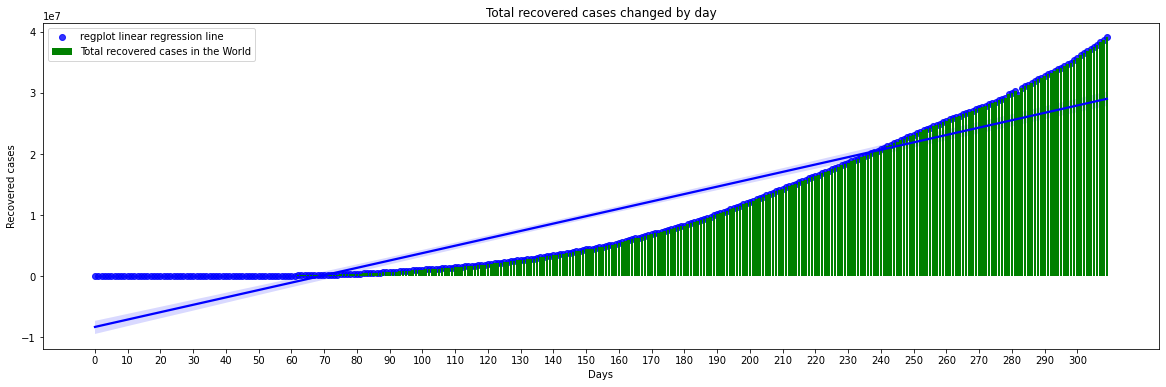

In [8]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Total recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
ax = sns.regplot(x=x_dat, y=totalrecovered_by_day, ci=95, label="regplot linear regression line", color="blue")
ax.legend(loc="upper left")
plt.title("Total recovered cases changed by day")

('Total Recovered', totalrecovered_by_day[-1])

### Number of RECOVERED in CHINA from day 0 to latest day 

(('Last day Increasing', 12), ('Total Confirmed', 86900))

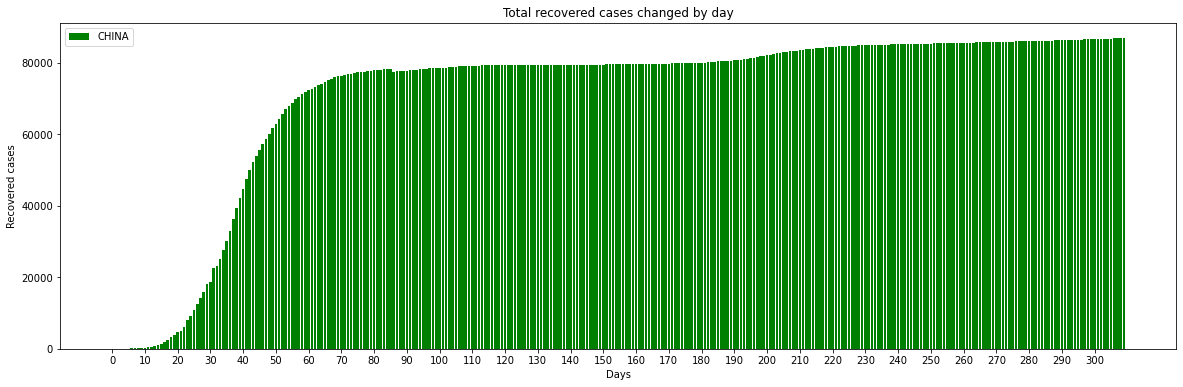

In [9]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, y_dat_recovered['China'], color='green', label="Total Recovered cases in China")
plt.legend(["CHINA"], loc='upper left')

plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.title("Total recovered cases changed by day")

('Last day Increasing', y_dat_recovered['China'][-1]-y_dat_recovered['China'][-2]), ('Total Confirmed', y_dat_recovered['China'][-1])

('Last day: ', 12, 'Highest Number: ', 3994.0)

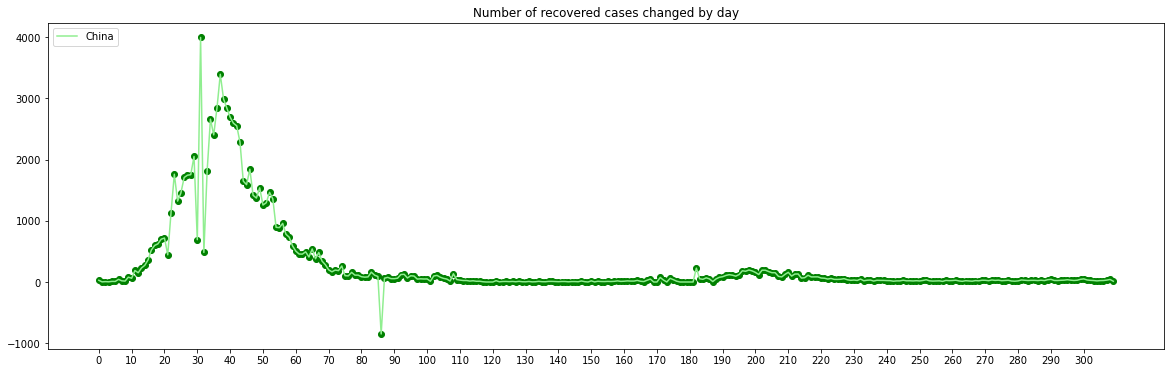

In [10]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(*zip(*y_dat_recovered_ByDay['China']), color='lightgreen', label='Recovered cases in China changed by day')
plt.scatter(*zip(*y_dat_recovered_ByDay['China']), color='green', label='Recovered cases in China changed by day')
plt.title("Number of recovered cases changed by day")
plt.legend(["China"], loc='upper left')

'Last day: ', y_dat_recovered_ByDay['China'][-1][1], 'Highest Number: ', np.max(list(list(zip(*y_dat_recovered_ByDay['China']))[1]))

#### Notes: it seems there were bias at day 84 and day 85

### Number of RECOVERED in GERMANY from day 0 to latest day 

(('Last day Increasing', 19164), ('Total Confirmed', 685537))

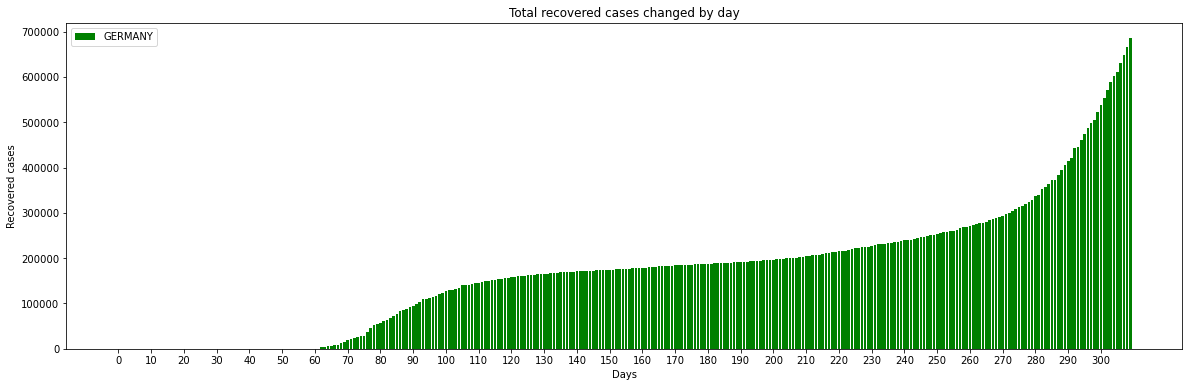

In [11]:
plt.bar(x_dat, y_dat_recovered['Germany'], color='green')
plt.legend(["GERMANY"], loc='upper left')

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.title("Total recovered cases changed by day")

('Last day Increasing', y_dat_recovered['Germany'][-1]-y_dat_recovered['Germany'][-2]), ('Total Confirmed', y_dat_recovered['Germany'][-1])

('Last day: ', 19164, 'Highest Number: ', 22470.0)

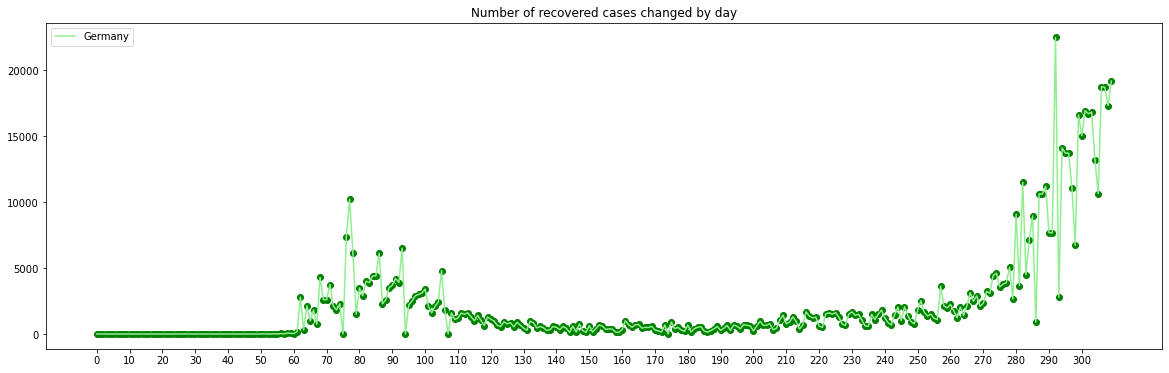

In [12]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(*zip(*y_dat_recovered_ByDay['Germany']), color='lightgreen')
plt.scatter(*zip(*y_dat_recovered_ByDay['Germany']), color='green')
plt.title("Number of recovered cases changed by day")
plt.legend(["Germany"], loc='upper left')

'Last day: ', y_dat_recovered_ByDay['Germany'][-1][1], 'Highest Number: ', np.max(list(list(zip(*y_dat_recovered_ByDay['Germany']))[1]))

### Number of RECOVERED in ITALY from day 0 to latest day

(('Last day Increasing', 24031), ('Total Confirmed', 661180))

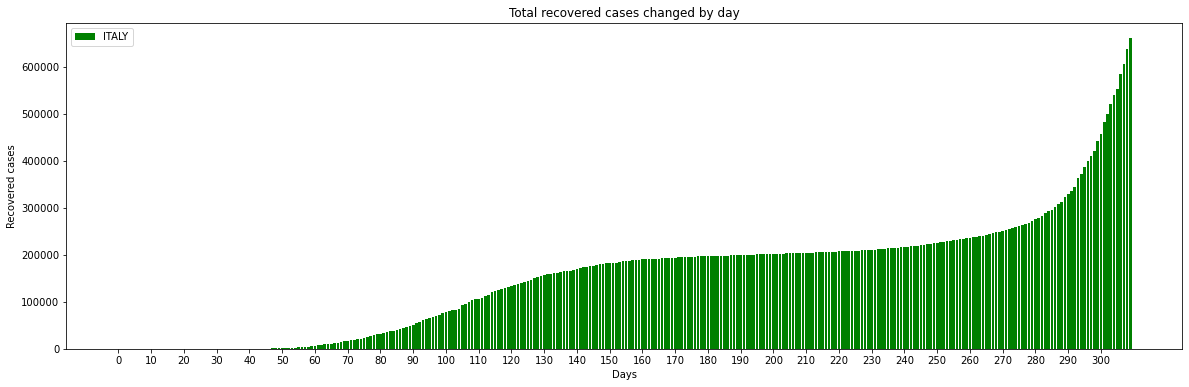

In [13]:
plt.bar(x_dat, y_dat_recovered['Italy'], color='green')
plt.legend(["ITALY"], loc='upper left')

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.title("Total recovered cases changed by day")

('Last day Increasing', y_dat_recovered['Italy'][-1]-y_dat_recovered['Italy'][-2]), ('Total Confirmed', y_dat_recovered['Italy'][-1])

('Last day: ', 24031, 'Highest Number: ', 31819.0)

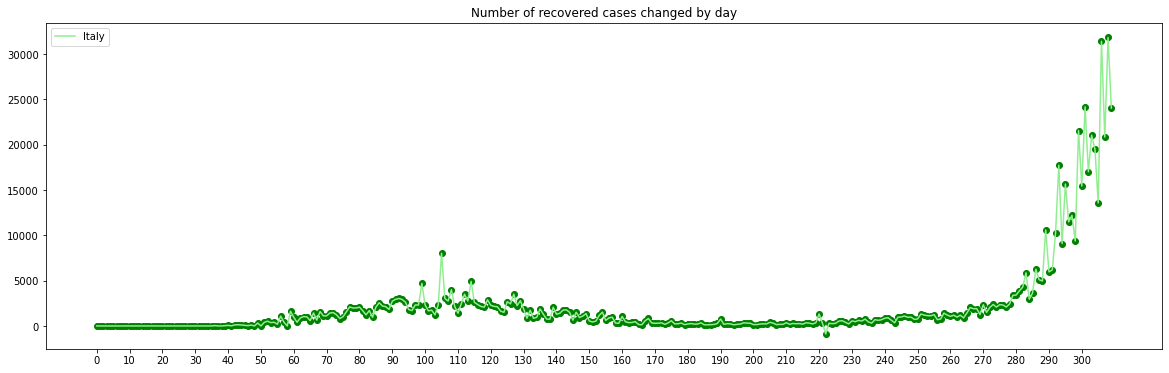

In [14]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(*zip(*y_dat_recovered_ByDay['Italy']), color='lightgreen')
plt.scatter(*zip(*y_dat_recovered_ByDay['Italy']), color='green')
plt.title("Number of recovered cases changed by day")
plt.legend(["Italy"], loc='upper left')

'Last day: ', y_dat_recovered_ByDay['Italy'][-1][1], 'Highest Number: ', np.max(list(list(zip(*y_dat_recovered_ByDay['Italy']))[1]))

### Number of RECOVERED in SOUTH KOREA from day 0 to latest day 

(('Last day Increasing', 153), ('Total Confirmed', 27103))

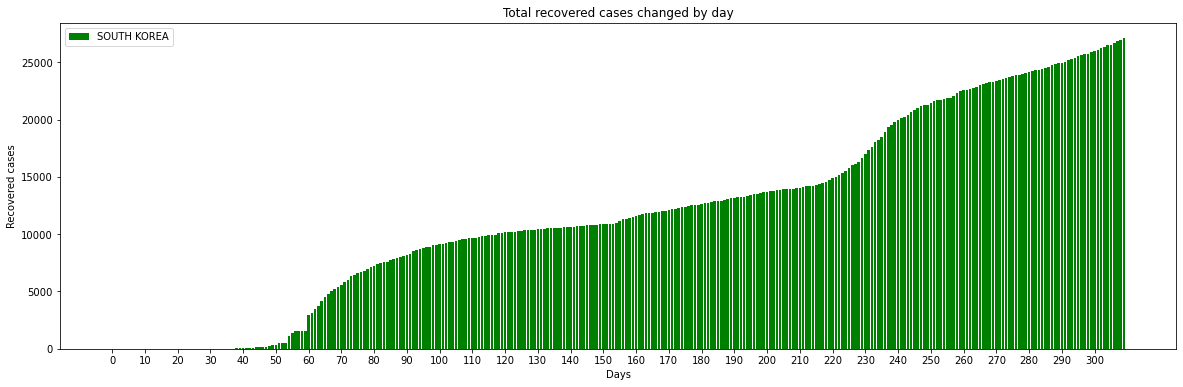

In [15]:
plt.bar(x_dat, y_dat_recovered['Korea, South'], color='green')
plt.legend(["SOUTH KOREA"], loc='upper left')

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.title("Total recovered cases changed by day")

('Last day Increasing', y_dat_recovered['Korea, South'][-1]-y_dat_recovered['Korea, South'][-2]), ('Total Confirmed', y_dat_recovered['Korea, South'][-1])

('Last day: ', 153, 'Highest Number: ', 1369.0)

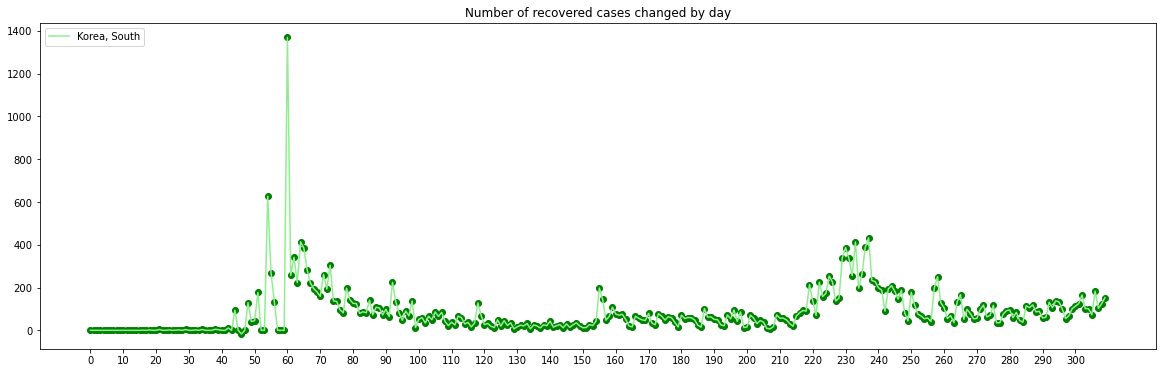

In [16]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(*zip(*y_dat_recovered_ByDay['Korea, South']), color='lightgreen')
plt.scatter(*zip(*y_dat_recovered_ByDay['Korea, South']), color='green')
plt.title("Number of recovered cases changed by day")
plt.legend(["Korea, South"], loc='upper left')

'Last day: ', y_dat_recovered_ByDay['Korea, South'][-1][1], 'Highest Number: ', np.max(list(list(zip(*y_dat_recovered_ByDay['Korea, South']))[1]))

#### In above chart, it seems there was data bias at days 44 and 45 in Korea because at day 46 the total number of recovered has been adjusted lower. 


### Number of RECOVERED in JAPAN from day 0 to latest day 

(('Last day Increasing', 1653), ('Total Confirmed', 116222))

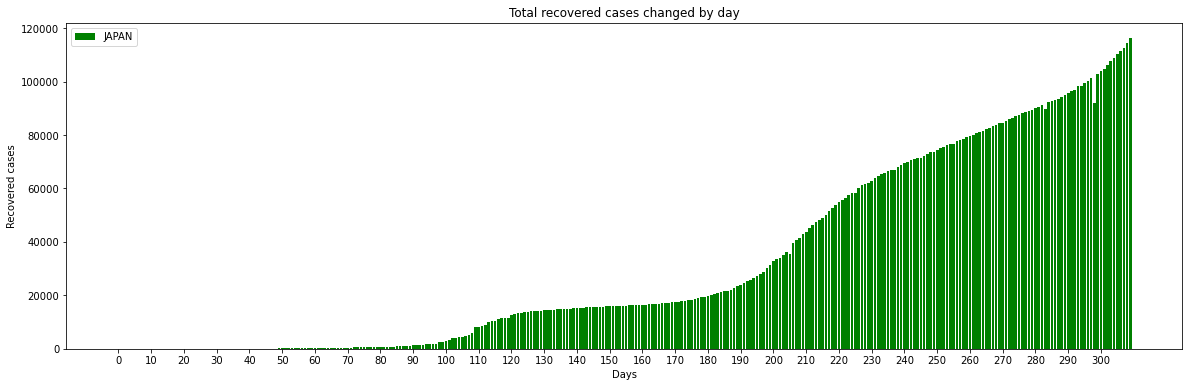

In [17]:
plt.bar(x_dat, y_dat_recovered['Japan'], color='green')
plt.legend(["JAPAN"], loc='upper left')
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.title("Total recovered cases changed by day")

('Last day Increasing', y_dat_recovered['Japan'][-1]-y_dat_recovered['Japan'][-2]), ('Total Confirmed', y_dat_recovered['Japan'][-1])

('Last day: ', 1653, 'Highest Number: ', 10856.0)

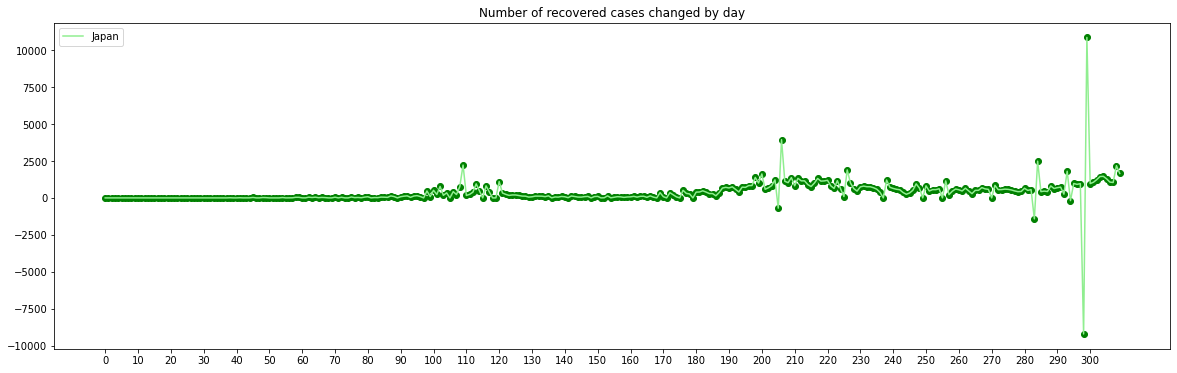

In [18]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(*zip(*y_dat_recovered_ByDay['Japan']), color='lightgreen')
plt.scatter(*zip(*y_dat_recovered_ByDay['Japan']), color='green')
plt.title("Number of recovered cases changed by day")
plt.legend(["Japan"], loc='upper left')

'Last day: ', y_dat_recovered_ByDay['Japan'][-1][1], 'Highest Number: ', np.max(list(list(zip(*y_dat_recovered_ByDay['Japan']))[1]))

### Number of RECOVERED in the USA from day 0 to latest day 

(('Last day Increasing', 35247), ('Total Confirmed', 4871203))

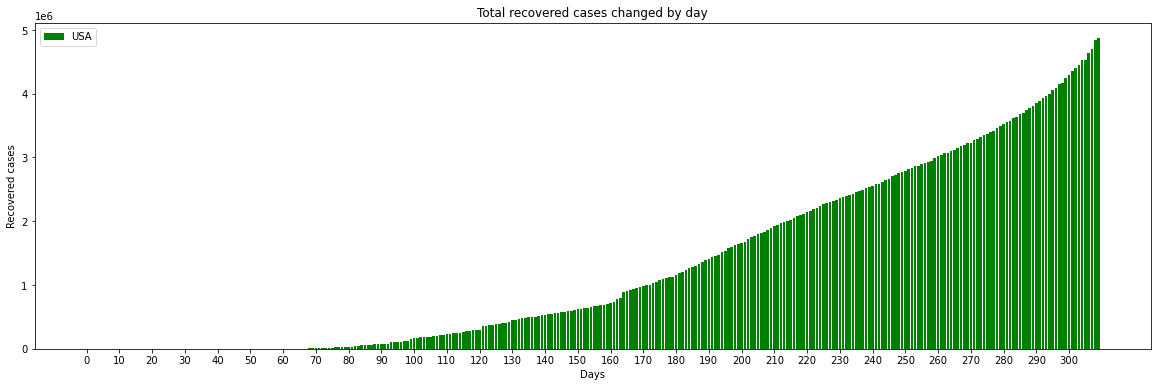

In [19]:
plt.bar(x_dat, y_dat_recovered['US'], color='green')
plt.legend(["USA"], loc='upper left')

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.title("Total recovered cases changed by day")

('Last day Increasing', y_dat_recovered['US'][-1]-y_dat_recovered['US'][-2]), ('Total Confirmed', y_dat_recovered['US'][-1])

('Last day: ', 35247, 'Highest Number: ', 139292.0)

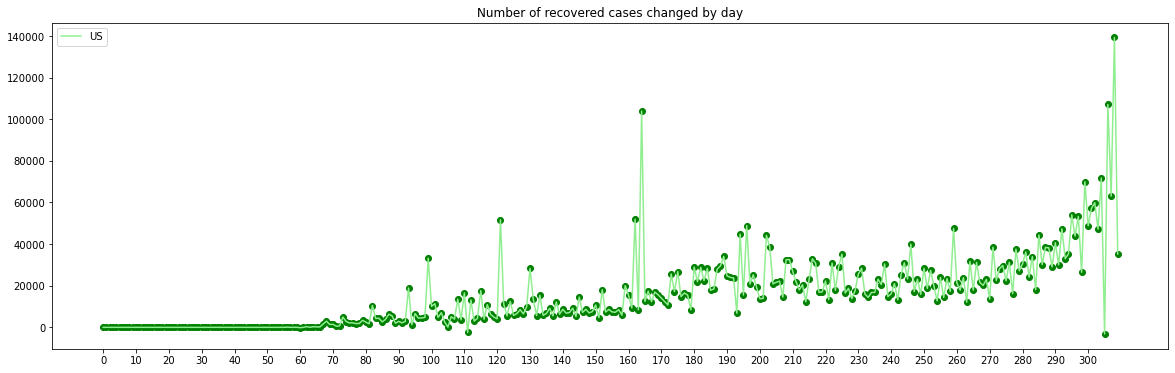

In [20]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(*zip(*y_dat_recovered_ByDay['US']), color='lightgreen')
plt.scatter(*zip(*y_dat_recovered_ByDay['US']), color='green')
plt.title("Number of recovered cases changed by day")
plt.legend(["US"], loc='upper left')
'Last day: ', y_dat_recovered_ByDay['US'][-1][1], 'Highest Number: ', np.max(list(list(zip(*y_dat_recovered_ByDay['US']))[1]))

#### Note: bias at days 61, 62 no data is given (Stand: 25.03.2020)

### Number of RECOVERED in the Australia from day 0 to latest day 

(('Last day Increasing', 23), ('Total Confirmed', 25570))

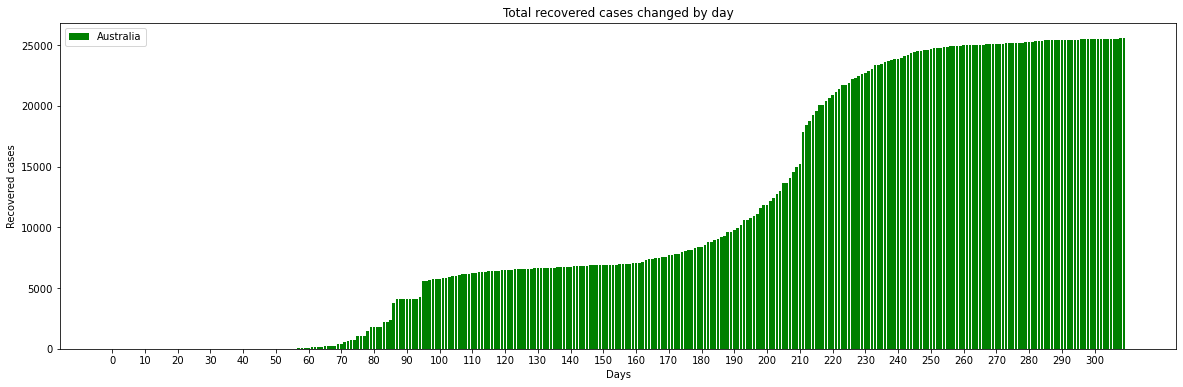

In [21]:
plt.bar(x_dat, y_dat_recovered['Australia'], color='green')
plt.legend(["Australia"], loc='upper left')

plt.xticks(np.arange(0, max(x_dat)+1, 10))
# plt.yticks(np.arange(0, max(y_dat_recovered_au)+1, 2))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.title("Total recovered cases changed by day")

('Last day Increasing', y_dat_recovered['Australia'][-1]-y_dat_recovered['Australia'][-2]), ('Total Confirmed', y_dat_recovered['Australia'][-1])

('Last day: ', 23, 'Highest Number: ', 2605.0)

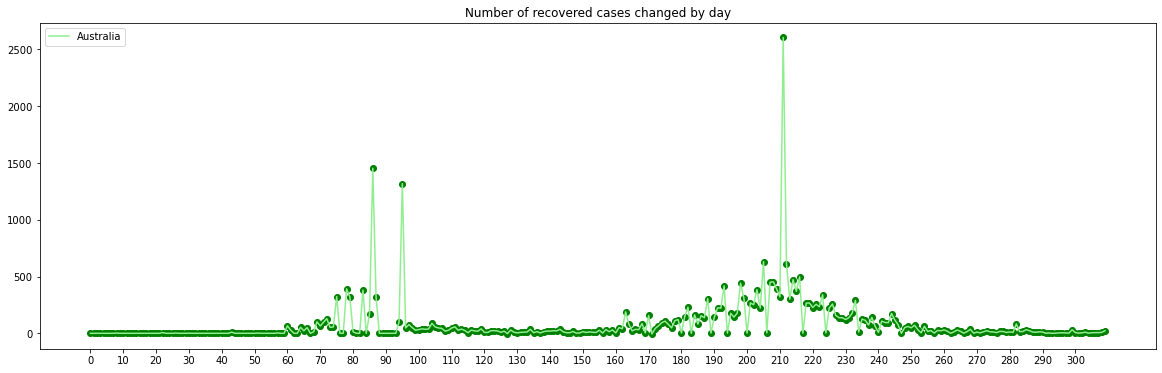

In [22]:
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(*zip(*y_dat_recovered_ByDay['Australia']), color='lightgreen')
plt.scatter(*zip(*y_dat_recovered_ByDay['Australia']), color='green')
plt.title("Number of recovered cases changed by day")
plt.legend(["Australia"], loc='upper left')

'Last day: ', y_dat_recovered_ByDay['Australia'][-1][1], 'Highest Number: ', np.max(list(list(zip(*y_dat_recovered_ByDay['Australia']))[1]))